# Prepare

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


# Activation function

logic: Doing some activation -> satisfy some conditions -> activate

Our perceptron and node are designed to be activated if we satisfy the condition. To activate perceptrons, we have to set a standard!!

For example, ReLU function can be "a function which is activated upper than 0, deactivated lower than 0".

> 👀 Why do we use activation functions?  
> 📖 Activation functions can improve the **representation capacity** or **expressivity**!  
> We cannot express $x^2$ or $x^5$ with a function $f(x) = xw_1 + b_1$ because the function is **linear** function and $x^2$ or $x^5$ are **non-linear** function!  
> So if we want to represent non-linear data, the model also has to have non-linearity.

# Perceptron

[History of the Perceptron](https://web.csulb.edu/~cwallis/artificialn/History.htm)

## Neuron Cells

Neuron cells are constituted with Soma, Dendrite, Axon, Synapse.

# Linear Transformation

To satisfy definition, a function T and vector space V, W have to satisfy two conditions below this sentence.

- Additivity: $T(x+y) = T(x) = T(y)$ for all x, y in **V**
- Homogeneity: $T(cx) = cT(x)$ for all x in **V** and c in $\mathbb R$

And If function T is linear, then T has some properties below.

- T(0) = 0
- T(cx+y) = cT(x) + T(y)
- T(x-y) = T(x) - T(y)
- $T(\sum_{i=1}^{n}a_ix_i)$ = $T(\sum_{i=1}^{n}a_iT(x_i))$

# Why do we use non-linear function?

**To improve representation capacity!**

![2](https://images.velog.io/images/och9854/post/f153380c-5517-4549-91d7-ed489f0c3c7c/image.png)

Let's say we have three perceptron model, and we can say like this.

> $y = f(w_3  f(w_2  f(w_1 x)))$

What if f is linear?

We can say $f(w_1x) = w_1 f(x)$. Then we can combine $w_1, w_2, w_3$ like this.

> $y = =f(f(f(Wx)))$

So actually anything is different from using only one perceptron layer if function f is linear.

## Composition Function

If V, W and Z are spaces in Real number space and function T: V -> W and function U: W -> Z are linear,

> Then **composition function UT: V->Z is also linear!**

### Proof

x, y in V, a in R.

![1](https://images.velog.io/images/och9854/post/e7ca54ef-31d7-4758-acec-1a66621ee96c/image.png)

![1](https://images.velog.io/images/och9854/post/54e22c89-e024-477f-8b8c-655b147cdbb4/image.png)

These two pictures are just the same.

# Activation Functions

## (1) Binary step function

![1](https://images.velog.io/images/och9854/post/c9027e69-3da3-402a-b370-52543b9009dc/image.png)



### 1) limitation: Cannot represent XOR gate

In [3]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 defualt 값을 설정해주세요
    return 0 if x<threshold else 1

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

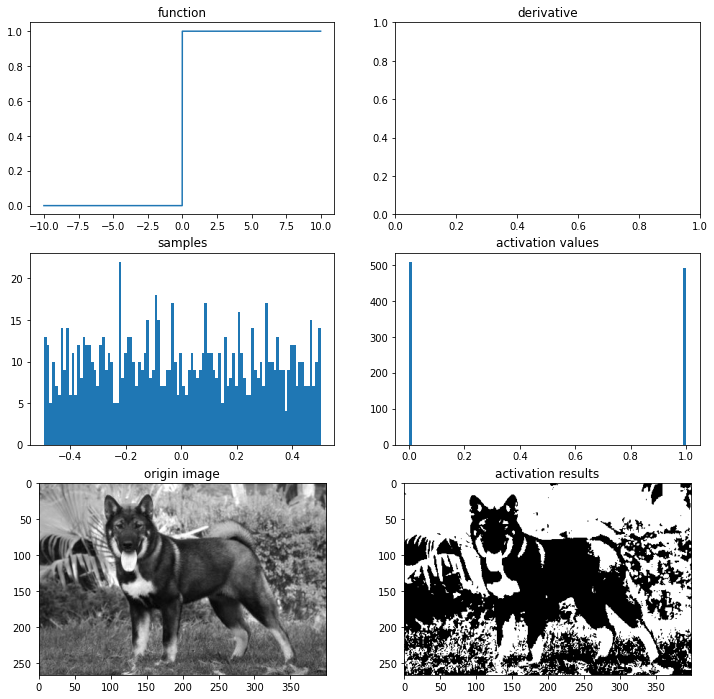

In [5]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

In [6]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

This percepron and solve the linearly separable problem.

In [7]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

![1](https://images.velog.io/images/och9854/post/9fd789d6-197d-413c-a589-89207b044540/image.png)

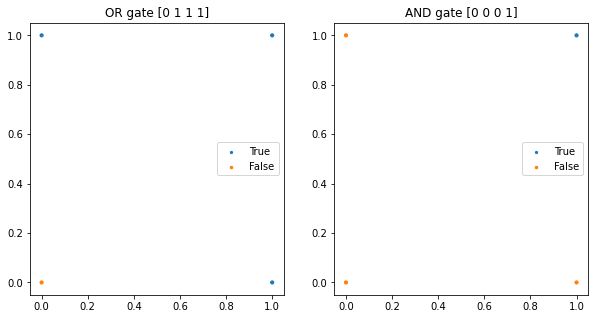

In [8]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [9]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.01770505, 0.28865621]), array([-0.00876832]))
999th epoch, accuracy : 1.0
(array([0.23191733, 0.00856982]), array([-0.23533838]))


You can see that this model works well. Now let's visualize it

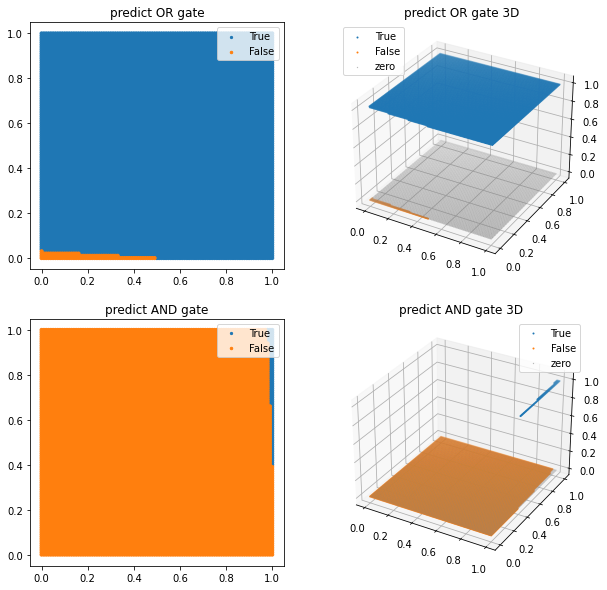

In [10]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

But we cannot make XOR gate with one layer perceptron. Because XOR gate graph cannot be seperated by only one line. So we have to stack many layers and this is called **multi-layer perceptron**.

![2](https://images.velog.io/images/och9854/post/a21d4bca-c5ef-455f-85f8-d1431d239dd6/image.png)

### (2) limitation: cannot use backpropagation algorithm

We cannot do backpropation because binary step function cannot be differentiated in 0 and even thought we differentiate we will get 0 value in other values.

Also, **we cannot have multi-class outout**

## (2) Linear activation function



This linear activation function can have multi-class output and it's diffentiable.   
One typical function is $f(x) = x$. You can get the output as same as input

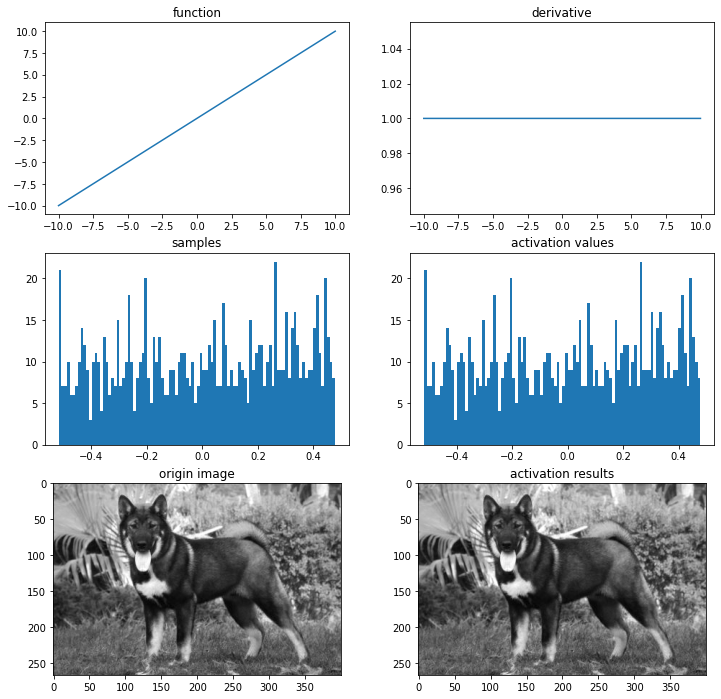

In [11]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 선형 함수
def linear(x):
    return x

def dev_linear(x):
    return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

The range of linear activation function is $\mathbb R$.   
This function can solve the problem which is linearly seperable.

Let's see AND gate and OR gate again.

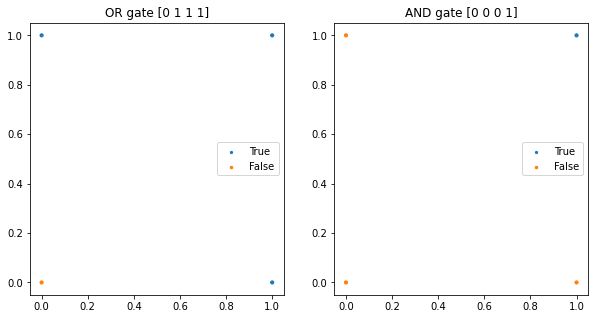

In [12]:
# AND gate, OR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

You can make these gates using single layer perceptron which uses linear activation function.

![2](https://images.velog.io/images/och9854/post/aa4f27e2-4460-4647-b616-0d9d9012892e/image.png)



In [13]:
import tensorflow as tf

# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [14]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=0)
and_linear_model.fit(X, and_y, epochs=1000, verbose=0)
print('done')

done


/opt/conda/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


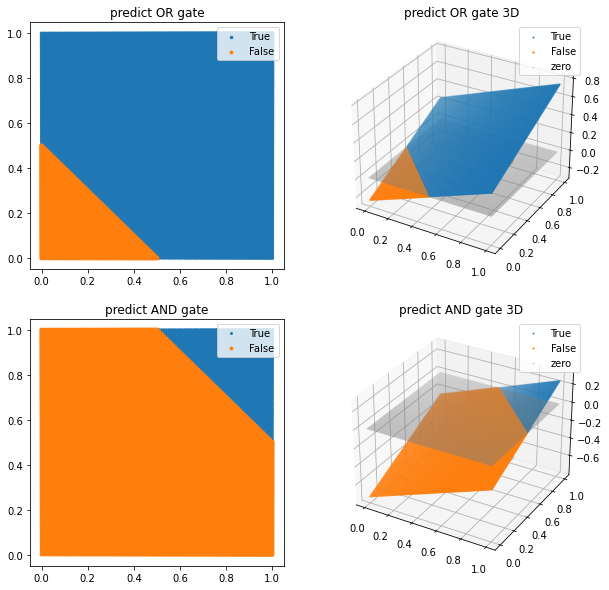

In [15]:
# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

Of course, single layer perceptron which used linear activation can't always concisly predict the vaule.

We can't make perfect XOR gate. We can't predict the data which is non-linear.

## (3) Non-linear function

Now let's solve some problem that we saw by just now.

### sigmoid, logistic

sigmoid can be represented like this.

![](https://images.velog.io/images/och9854/post/53a68d72-b591-4791-a894-240817b72228/image.png)

The range of sigmoid is (0,1). The reason why we use sigmoid is the range especially when we need to predict a probability.

Derivative of sigmoid is like this.

![](https://images.velog.io/images/och9854/post/9ad93ebc-8e14-49d1-94e6-f808cbd4df45/image.png)


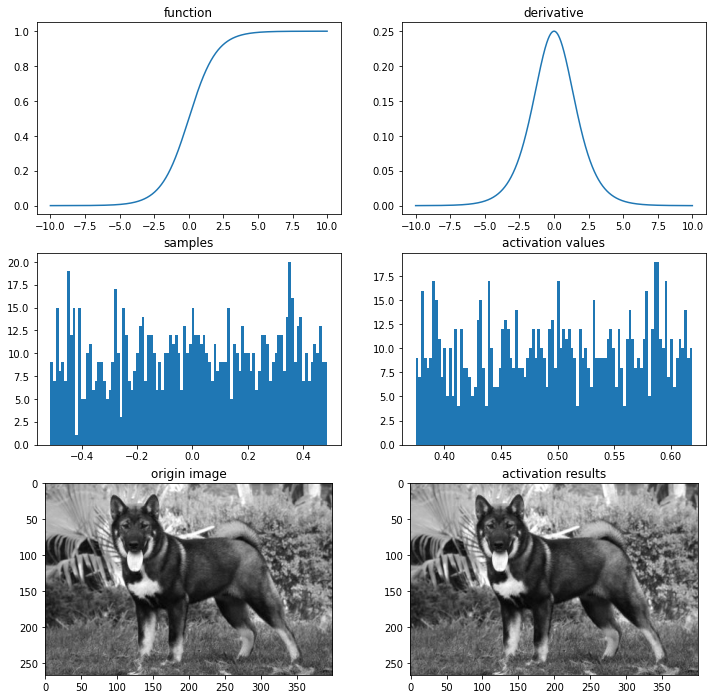

In [20]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

### Disadvantage

> Sigmoid function saturates at 0 or 1. And at backpropagation, every values approaches to 0 so it kills the gradient.

> It's not **zero-centered**! It takes lots of time to train.

### AND, OR, XOR gate

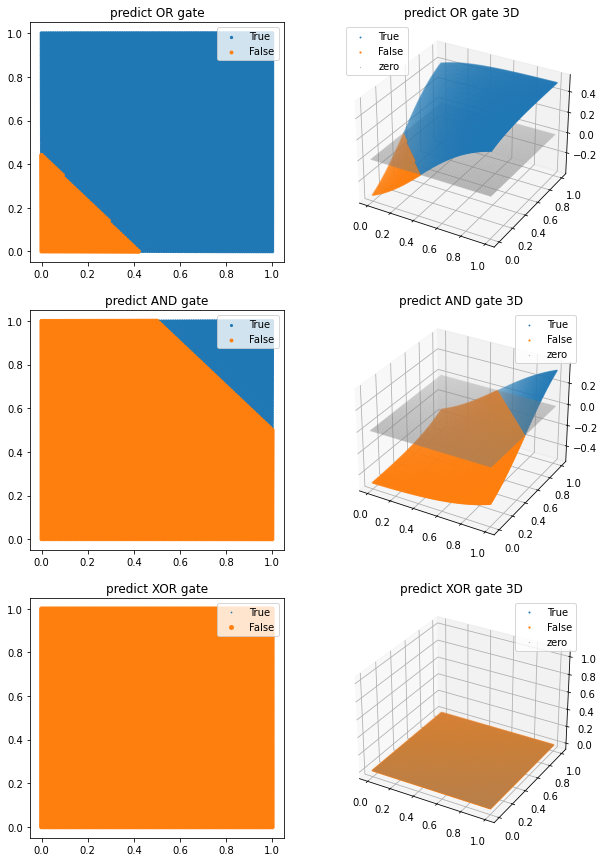

In [25]:
# OR gate
or_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
or_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_sigmoid_model.fit(X, or_y, epochs=1000, verbose=0)

# AND gate
and_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
and_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_sigmoid_model.fit(X, and_y, epochs=1000, verbose=0)

# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_sigmoid_model(test_X)
pred_and_y = and_sigmoid_model(test_X)
pred_xor_y = xor_sigmoid_model(test_X)

plt.figure(figsize=(10,15))
ax1 = plt.subplot(3,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(3,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(3,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(3,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

ax5 = plt.subplot(3,2,5)
ax5.set_title('predict XOR gate')
ax5 = scatter_plot(ax5, test_X, pred_xor_y, threshold=0.5)

ax6 = plt.subplot(3,2,6, projection='3d')
ax6.set_title('predict XOR gate 3D')
ax6 = scatter_plot(ax6, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

We can see that sigmoid function also couldn't predict XOR.

[Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182)

As you can read in the link, if we add **quadratic polynomial**, then we can make XOR gate.


/opt/conda/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


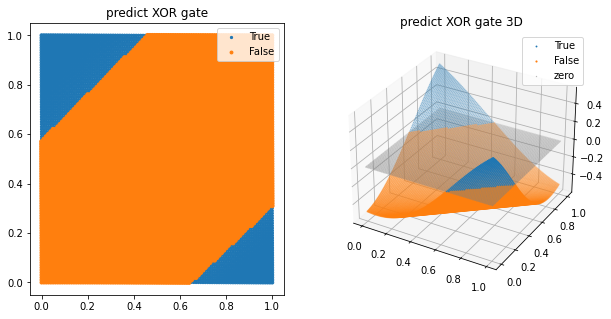

In [26]:
# 레이어를 추가했을 때
# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'), # 2 nodes로 변경
    tf.keras.layers.Dense(1)
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

plt.figure(figsize=(10,5))
pred_xor_y = xor_sigmoid_model(test_X)

ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

### What is softmax?

Softmax function is used for **multi-class probability**. The big feature of softmax is sum of all cases is 1. So we use softmax in the last layer of model.

## (4) tanh

tanh(Hyperbolic tangent) function is one of the hyperbolic functions.

Tanh function is zero centered which has range from - 1 to 1. So it can be trained faster than sigmoid.

Tanh can be represented with sigmoid function.

![](https://images.velog.io/images/och9854/post/92a7cb71-9a9b-4b33-8907-da27d9fa2065/image.png)

Derivative of tanh is like this.

![](https://images.velog.io/images/och9854/post/cce9daf6-4743-46f0-b74b-1b60d498a06a/image.png)

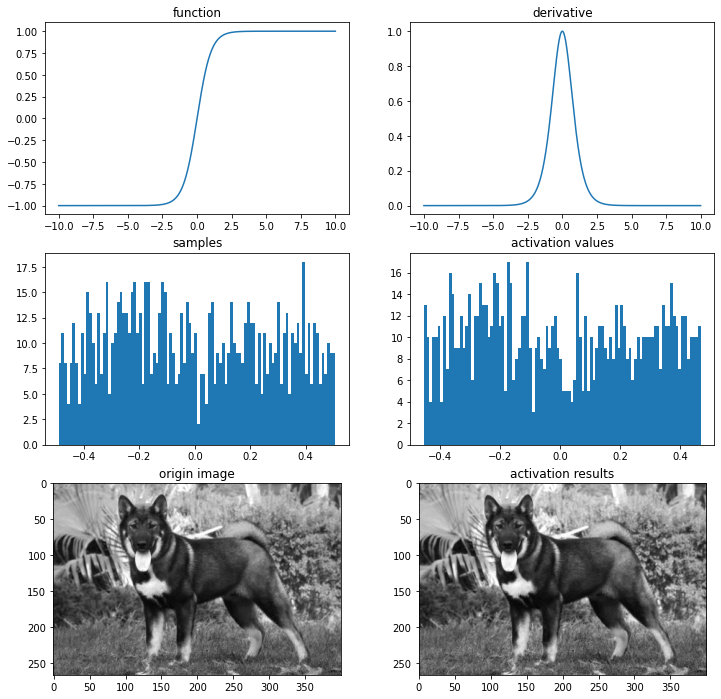

In [27]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

## Another non-linear function :ReLU

Rectified linear unit is commonly used nowadays.

![](https://images.velog.io/images/och9854/post/2ae29589-591c-4d57-86c2-94c8414708a1/image.png)


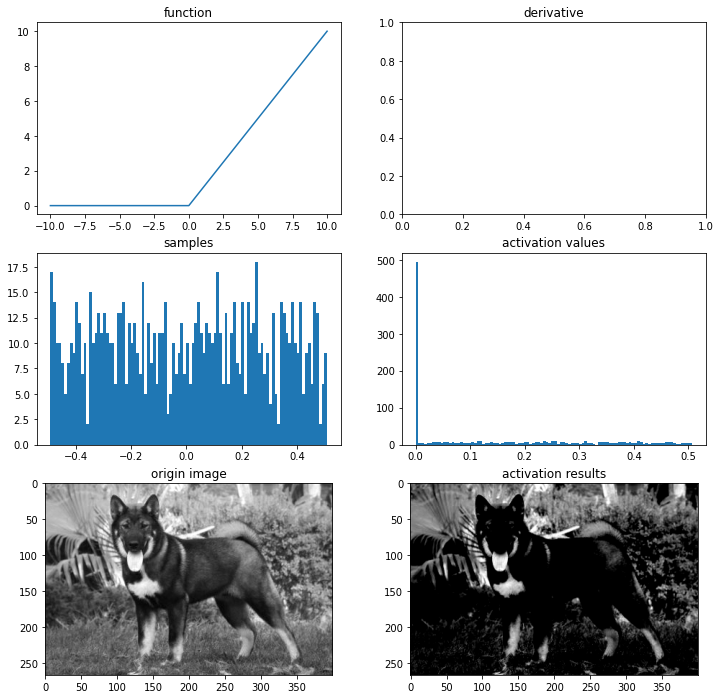

In [28]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

The range of ReLU is form 0 to infinity. Learning speed of model with ReLU is much faster than model with tanh.

![](https://images.velog.io/images/och9854/post/ee3b8ad1-b7cd-4f8f-a49c-69d2b9dd272b/image.png)

[ref : http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf]

And ReLU is differentiable expect x = 0

![](https://images.velog.io/images/och9854/post/5686d1f6-199a-4aca-8d00-2c561f201dba/image.png)

### Can ReLU function get non-linear features?

yes: [ReLU Deep Neural Networks and Linear Finite Elements](https://arxiv.org/abs/1807.03973)



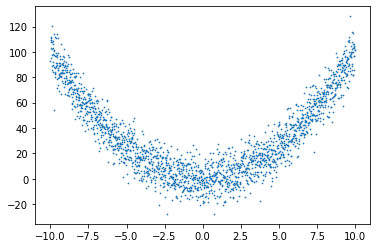

In [30]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [31]:
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 6         
___________________________________

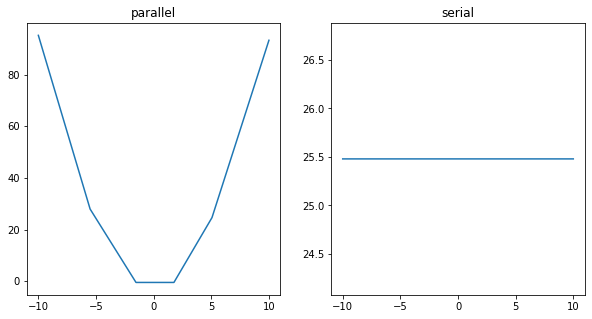

In [32]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

We compared parallel and serial nodes and found that parellel structure works better than serial structure.

### Disadvantage

- Not zero centered
- Dying ReLU

## Other tries to improve the weakness of ReLU

### Leaky ReLU

![](https://images.velog.io/images/och9854/post/36618d97-579d-4991-ad4a-7c3d0c320bdb/image.png)



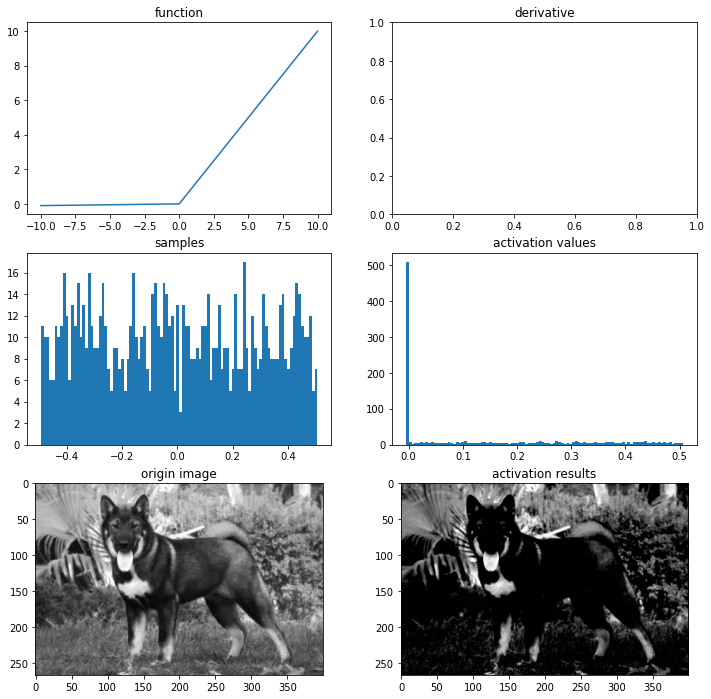

In [33]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

### PReLU

PReLU is similar with Leaky ReLU but has a new parameter 0. This is for training the **slope when x is lower than 0**

![](https://images.velog.io/images/och9854/post/e779533c-853d-4292-b108-781c06d69484/image.png)

$\alpha$ is updated during train.

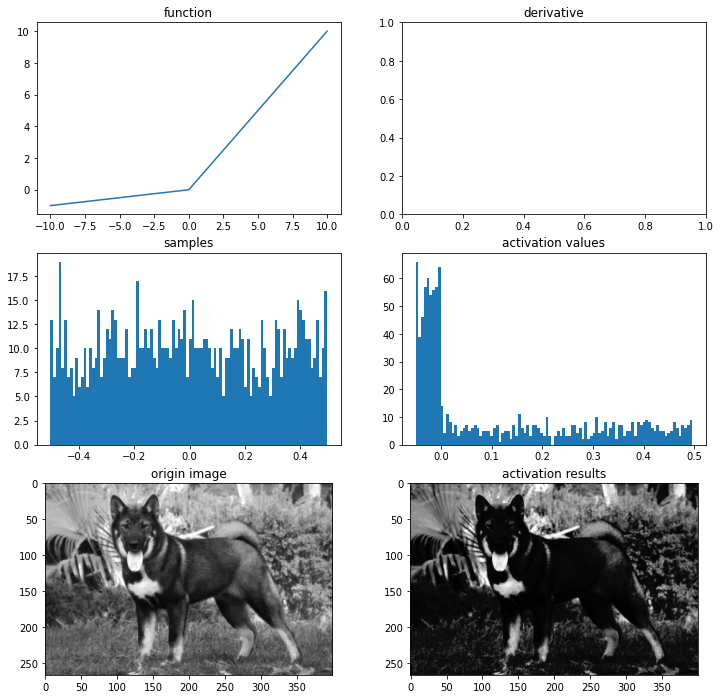

In [34]:
# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

### ELU

Exponential linear unit contains all advantages of ReLU and it also solved **Dying ReLU** problem.

![](https://images.velog.io/images/och9854/post/031be19d-f56c-49c4-b57e-53ac790d647d/image.png)

![](https://images.velog.io/images/och9854/post/1f666cb5-62fe-47b6-a13d-0151e31c433c/image.png)

Disadvantage of this function is exponential computation make computational cost high.

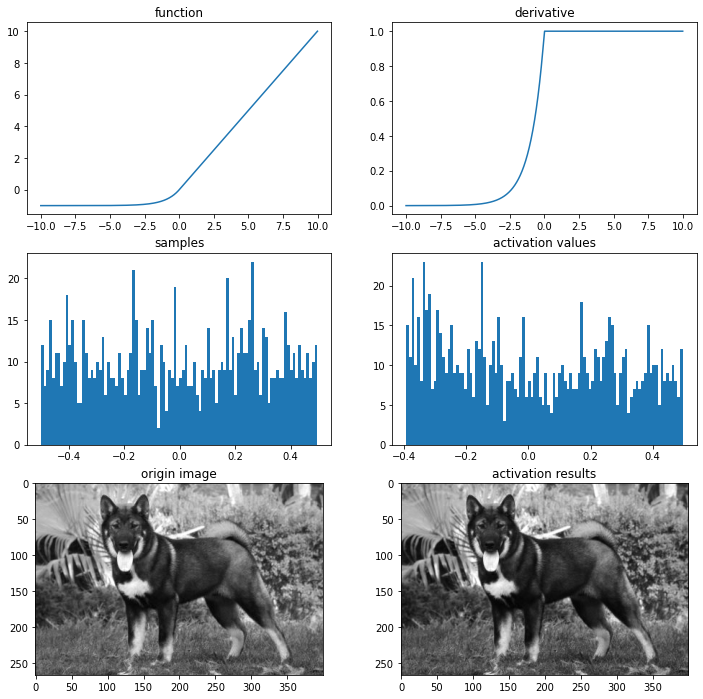

In [36]:
# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()